# Udacity - Data Analysis Nanodegree
### Project #5: Communicate Data Findings (Ford GoBike System Data)
#### by (Samar Osailan)

## Preliminary Wrangling

> The dataset contains Bay Wheels's trip data for public use

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# read dataset
df = pd.read_csv("202006-baywheels-tripdata.csv")
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.40000,37.760000,-122.420000,casual
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.49000,37.780000,-122.460000,casual
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.41095,37.790000,-122.440000,casual
3,CAFE64864422F475,electric_bike,2020-06-02 18:13:01,2020-06-02 18:48:30,NaN,NaN,NaN,NaN,37.760000,-122.41000,37.770000,-122.430000,casual
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.42921,37.772894,-122.509079,casual


In [3]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158168 entries, 0 to 158167
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             158168 non-null  object 
 1   rideable_type       158168 non-null  object 
 2   started_at          158168 non-null  object 
 3   ended_at            158168 non-null  object 
 4   start_station_name  99220 non-null   object 
 5   start_station_id    99220 non-null   float64
 6   end_station_name    97151 non-null   object 
 7   end_station_id      97151 non-null   float64
 8   start_lat           158168 non-null  float64
 9   start_lng           158168 non-null  float64
 10  end_lat             157892 non-null  float64
 11  end_lng             157892 non-null  float64
 12  member_casual       158168 non-null  object 
dtypes: float64(6), object(7)
memory usage: 15.7+ MB


,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,99220.000000,97151.000000,158168.000000,158168.000000,157892.000000,157892.000000
mean,222.670762,220.933104,37.730514,-122.353640,37.730497,-122.353779
std,170.109389,169.794631,0.140991,0.170709,0.141111,0.170778
min,3.000000,3.000000,37.240000,-122.510000,37.230000,-122.540000
25%,73.000000,73.000000,37.760000,-122.431873,37.760000,-122.431184
50%,156.000000,149.000000,37.773717,-122.412036,37.773532,-122.412073
75%,381.000000,380.000000,37.788396,-122.391173,37.788927,-122.391198
max,532.000000,532.000000,37.880222,-121.770000,37.950000,-121.760000


In [4]:
df.started_at = pd.to_datetime(df.started_at)
df.ended_at = pd.to_datetime(df.ended_at)

In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.40000,37.760000,-122.420000,casual
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.49000,37.780000,-122.460000,casual
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.41095,37.790000,-122.440000,casual
3,CAFE64864422F475,electric_bike,2020-06-02 18:13:01,2020-06-02 18:48:30,NaN,NaN,NaN,NaN,37.760000,-122.41000,37.770000,-122.430000,casual
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.42921,37.772894,-122.509079,casual


In [6]:
# add a new column that will calculate the trip duration
df["trip_duration"] = df.ended_at - df.started_at
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.40000,37.760000,-122.420000,casual,00:11:18
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.49000,37.780000,-122.460000,casual,00:21:15
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.41095,37.790000,-122.440000,casual,00:14:38
3,CAFE64864422F475,electric_bike,2020-06-02 18:13:01,2020-06-02 18:48:30,NaN,NaN,NaN,NaN,37.760000,-122.41000,37.770000,-122.430000,casual,00:35:29
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.42921,37.772894,-122.509079,casual,00:50:04


In [7]:
df.trip_duration = df.trip_duration.dt.seconds
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.40000,37.760000,-122.420000,casual,678
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.49000,37.780000,-122.460000,casual,1275
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.41095,37.790000,-122.440000,casual,878
3,CAFE64864422F475,electric_bike,2020-06-02 18:13:01,2020-06-02 18:48:30,NaN,NaN,NaN,NaN,37.760000,-122.41000,37.770000,-122.430000,casual,2129
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.42921,37.772894,-122.509079,casual,3004


### What is the structure of your dataset?

> The dataset contains 158168 trips data for Bay Wheels's Ford GoBike described as rows with 13 features described as columns which are:
1- Bike ID
2- Bike type
3- Start Time and Date
4- End Time and Date
5- Start Station Name
6- Start Station ID
7- End Station Name
8- End Station ID
9- Start Station Latitude
10- Start Station Longitude
11- End Station Latitude
12- End Station Longitude
13- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

### What is/are the main feature(s) of interest in your dataset?

> I am curious to know how user and bike type can affect the trip duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> In my opinion, I think the user type will affect the duration more than the bike type. Also, I think the start and end station might affect the duration too.

## Univariate Exploration

> To start with, I will look up the trip duration column which is the main feature I am interested in.

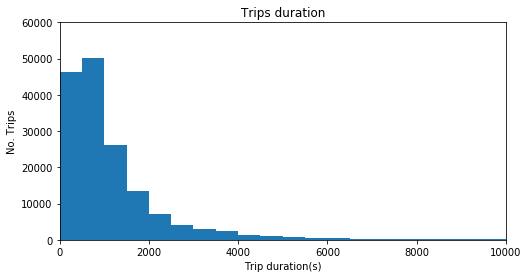

In [8]:
binsize = 500
bins = np.arange(0, df['trip_duration'].max()+binsize, binsize)

plt.figure(figsize=[8, 4])
plt.hist(data = df, x = 'trip_duration', bins = bins)
plt.title('Trips duration')
plt.xlabel('Trip duration(s)')
plt.ylabel('No. Trips')
plt.axis([0, 10000, 0, 60000])
plt.show()

The distirbution is right skewed where the number of trips started to increase from  about 45000 to a peak of 50000 and then it starts to fall down under 10000 for more than 2000 seconds.

Next, I will look up for the user and bike type features.


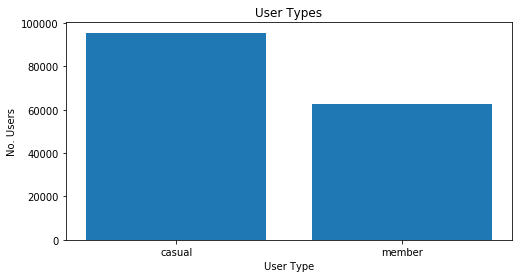

In [9]:
plt.figure(figsize=[8, 4])
plt.bar(x = df.member_casual.value_counts().keys(), height = df.member_casual.value_counts() )
plt.title('User Types')
plt.xlabel('User Type')
plt.ylabel('No. Users')
plt.show()

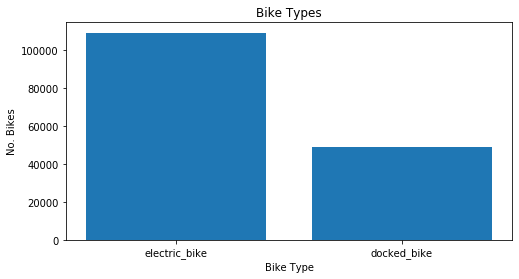

In [10]:
plt.figure(figsize=[8, 4])
plt.bar(x = df.rideable_type.value_counts().keys(), height = df.rideable_type.value_counts() )
plt.title('Bike Types')
plt.xlabel('Bike Type')
plt.ylabel('No. Bikes')
plt.show()

As shown in the above figures, the most user type is casual. And for the bike type, the electric bike got more values.

Next, I will look up for the start and end stations features.

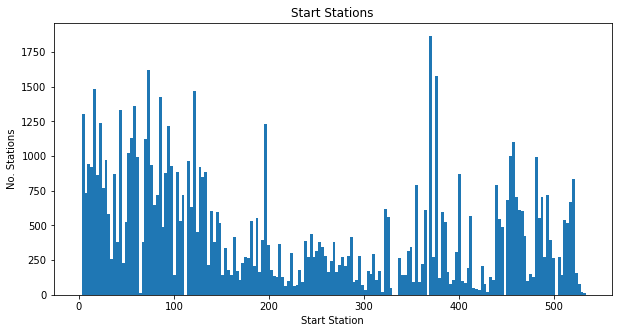

In [11]:
binsize = 3
bins = np.arange(0, df['start_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df.dropna(), x = 'start_station_id', bins = bins)
plt.title('Start Stations')
plt.xlabel('Start Station')
plt.ylabel('No. Stations')
plt.show()

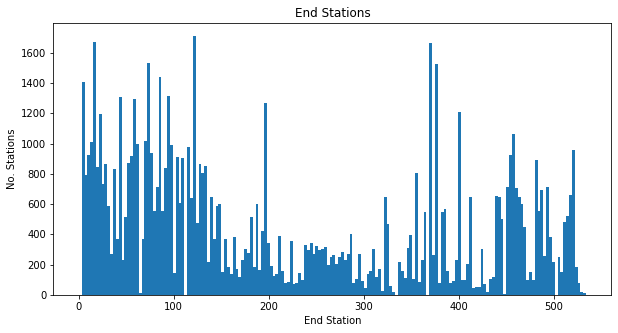

In [12]:
binsize = 3
bins = np.arange(0, df['end_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df.dropna(), x = 'end_station_id', bins = bins)
plt.title('End Stations')
plt.xlabel('End Station')
plt.ylabel('No. Stations')
plt.show()

As shown in the above figures, the start and end stations are almost the same.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Calculating the trip duration done from substracting the start time from the end time to get the results as seconds. And then after plotting the distribution, I found that it has a peak of 50000 and then the values are getting to fall down approximating zero.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Regarding the start and end stations distributions, the values couldn't be seen at the first stage because there's a lot of data in a small figure, so after giving a bigger place the distribution has better insight to see the values.

## Bivariate Exploration

> Now here, I will look up for the relationships between features, to figure out how each feature can affect the duration of the trip.

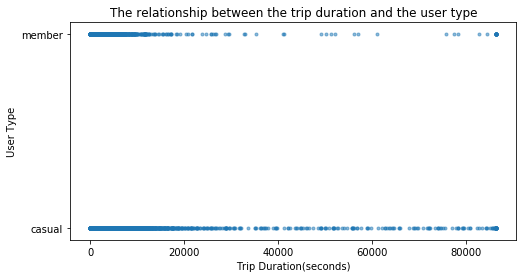

In [13]:
plt.figure(figsize=[8,4])
plt.scatter((df['trip_duration']), df['member_casual'], alpha = 0.5, marker = '.' )
plt.title('The relationship between the trip duration and the user type')
plt.xlabel('Trip Duration(seconds)')
plt.ylabel('User Type')
plt.show()

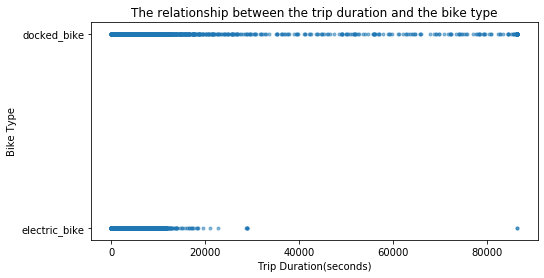

In [14]:
plt.figure(figsize=[8,4])
plt.scatter((df['trip_duration']), df['rideable_type'], alpha = 0.5, marker = '.' )
plt.title('The relationship between the trip duration and the bike type')
plt.xlabel('Trip Duration(seconds)')
plt.ylabel('Bike Type')
plt.show()

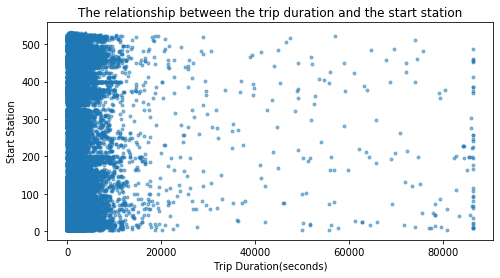

In [15]:
plt.figure(figsize=[8,4])
plt.scatter((df['trip_duration']), df['start_station_id'], alpha = 0.5, marker = '.' )
plt.title('The relationship between the trip duration and the start station')
plt.xlabel('Trip Duration(seconds)')
plt.ylabel('Start Station')
plt.show()

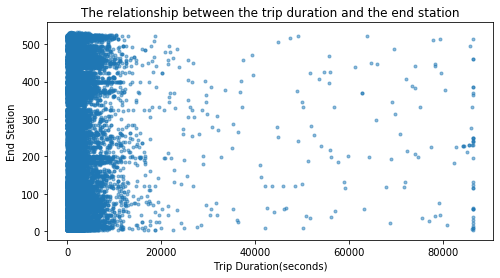

In [16]:
plt.figure(figsize=[8,4])
plt.scatter((df['trip_duration']), df['end_station_id'], alpha = 0.5, marker = '.' )
plt.title('The relationship between the trip duration and the end station')
plt.xlabel('Trip Duration(seconds)')
plt.ylabel('End Station')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> To conclude with, we can say the duratipn of the trip can be effected with user and bike types, while the start and end stations mot affecting with somehow.

> As shown above, there's more long trips when user type is casual, also for docked bike as a bike type.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> As I pretend before, the most effectable features are the user and bike type because they are dependant on a person who's riding.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

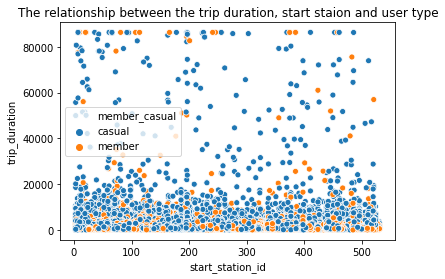

In [17]:
relation=sb.scatterplot(x='start_station_id',y='trip_duration',hue='member_casual',data=df)
plt.title('The relationship between the trip duration, start staion and user type')
plt.show()

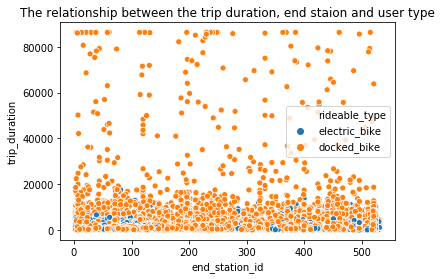

In [18]:
relation=sb.scatterplot(x='end_station_id',y='trip_duration',hue='rideable_type',data=df)
plt.title('The relationship between the trip duration, end staion and user type')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Finally, we can see that a casual user type and a docked bike type got the highest percentage in trip duration

### Were there any interesting or surprising interactions between features?

> it's surprising how docked bike got a higher percentage rather than an electric bike even while it's 2020.